# Вводные слова

##  О лекторе

Если есть вопросы, то буду рад вам помочь с ними разобраться. 
Пишите:

- http://vk.me/theotheo
- http://t.me/ibelyalov

## О вас

## О лекции
Хотелось бы создать представление о том, чем занимается НЛП: о задачах, результатах, о возможностях и проблемах

Чтобы вы могли гордо сказать: "НЛП? Ну я что-то слышал..."

# Введение

## Проблема

Распознавание кликбейтов

## Кликбейт
    Кликбейт-заголовок (от clickbait — клик-приманка) — преднамеренно искаженный заголовок материала, зачастую низкого качества, основная задача которого — привлечение внимания пользователей социальной сети и провокация с целью перейти по ссылке.
https://netpeak.net/ru/blog/klikbyeit-zagolovki-vse-pochemu-lenta-facebook-stanet-luchshe/

## Яндекс.Дзен 
| Признак | Пример |
| --- |  --- |
| Утаивание информации, без которой невозможно понять содержание материала | Вы никогда не поверите, кто упал на красной дорожке... |
| Бессмысленные эмоционально окрашенные фразы | Свежая фотоподборка! Полный угар! Лежали всем офисом |
| Преувеличение или искажение фактов | Ученые выяснили: планете осталось недолго... |
| Обилие лишних заглавных букв и знаков препинания | Случай на пляже В СОЧИ!!! СМОТРЕТЬ всем! |
| Повелительное наклонение, обращение на «ты» | Ты не поверишь, что скрывает правительство! Жми ссылку, чтобы узнать! |
| Искажение текста: лишние пробелы или их отсутствие, орфографические ошибки | Новая ЗВЕЗДАЯ диета! Читай пока неудалили! |

https://yandex.ru/support/zen/requirements/clickbait.html 

## ВК
![](https://pp.userapi.com/c850536/v850536189/73b13/qDY_Flls43I.jpg)
https://vk.com/@brown_room-click-click

## Facebook

    People tell us they don’t like stories that are misleading, sensational or spammy. That includes clickbait headlines that are designed to get attention and lure visitors into clicking on a link. In an effort to support an informed community, we’re always working to determine what stories might have clickbait headlines so we can show them less often.

https://newsroom.fb.com/news/2017/05/news-feed-fyi-new-updates-to-reduce-clickbait-headlines/

##

![](https://pp.userapi.com/c849528/v849528457/2a859/jVrN1a96OmA.jpg)
https://vk.com/weirdreparametrizationtrick?w=wall-131489096_4058

##  Корпус

      Abhijnan Chakraborty, Bhargavi Paranjape, Sourya Kakarla, and Niloy Ganguly. "Stop Clickbait: Detecting and Preventing Clickbaits in Online News Media”. In Proceedings of the 2016 IEEE/ACM International Conference on Advances in Social Networks Analysis and Mining (ASONAM), San Fransisco, US, August 2016.

https://github.com/bhargaviparanjape/clickbait

## Конвертация в dataframe

In [2]:
from pathlib import Path
import pandas as pd

clickbait_text = Path('clickbait/dataset/clickbait_data').read_text()
non_clickbait_text = Path('clickbait/dataset/non_clickbait_data').read_text()
clickbait = pd.DataFrame([(line, 1) for line in clickbait_text.split('\n') if line], columns=['text', 'label'])
non_clickbait = pd.DataFrame([(line, 0) for line in non_clickbait_text.split('\n') if line], columns=['text', 'label'])

df = pd.concat([clickbait, non_clickbait])
df = df.reset_index(drop=True)

# df.to_csv('df.csv', index=False)

## Пример

In [93]:
pd.options.display.max_colwidth = 0
df.sample(10)

,text,label
28006,Italian judge convicts 23 in CIA kidnapping case,0
670,21 Tumblr Posts That Will Speak Directly To Your Soul During Finals Week,1
7541,17 Dogs Who Just Want Their Beds Back,1
20098,Emerging Powers Prepare to Meet in Russia,0
15481,"For Anyone Who Watched ""Master Of None"" Just For Denise",1
5986,Are You More Halsey Or Melanie Martinez,1
5733,15 Mind-Blowing Ways To Eat Apples,1
28633,"No bomb threat, hijacking of plane in China's Xinjiang region according to Afghan officials",0
10007,"""Harry Potter And The Cursed Child"" Tickets Have Gone On Sale And People Are Losing Their Shit",1
29823,"With Winks and Dunks, Players Stump for Votes",0


## Dataframe

Грубо говоря табличный формат данных

## Структура данных

text -- заголовки

label -- 1, если кликбейт; 0, если не

## Итак

Есть примеры кликбейтов и есть примеры некликбейтов.

Как научить отличать их друг от друга?

# Решение в 1 строку. WOW!

## "Решаем"

In [ ]:
import random 

predict = [random.choice([0, 1]) for id, row in df.iterrows()] # вот она

predict[:10] # пример наших предсказаний

## Оценим результаты

## Метрики классификации

https://github.com/utd-ai/DMIA2018_Fall_public/blob/master/lecture05/L5_Validation.pdf

![](metrics1.png)

## Precision
![](metrics2.png)

## Recall
![](metrics3.png)

## F1
$F1 = 2\frac{precision \cdot recall}{precision + recall}$

## Матрица ошибок

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true, predict)
sns.heatmap(cm, annot=True, fmt='g')

NameError: name 'true' is not defined

In [218]:
from sklearn.metrics import classification_report

print(classification_report(true, predict))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16001
           1       0.50      0.50      0.50     15999

   micro avg       0.50      0.50      0.50     32000
   macro avg       0.50      0.50      0.50     32000
weighted avg       0.50      0.50      0.50     32000



# 5 правил кликбейта

In [ ]:
import re 
CLICKBAIT_RULES = ['^What', '^Who', '^Which', '^When', '\d+']

RULE = '|'.join(CLICKBAIT_RULES) # просто объединяем регулярки в одну строку

## 
![](regex.png)

https://regex101.com/r/WwV5Rg/1

## Оценка

In [20]:
predict = df['text'].str.match(RULE).astype(int)
cm = confusion_matrix(true, predict)

sns.heatmap(cm, annot=True, fmt='g')

NameError: name 'RULE' is not defined

In [227]:
print(classification_report(true, predict))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78     16001
           1       0.94      0.47      0.63     15999

   micro avg       0.72      0.72      0.72     32000
   macro avg       0.80      0.72      0.70     32000
weighted avg       0.80      0.72      0.70     32000



# Машинное обучение

## Пример, который вы не забудете

http://www.r2d3.us/Наглядное-Введение-в-Теорию-Машинного-Обучения/

## 
::: columns

:::: column
X -- матрица фичей

y -- вектор лейблов
::::

:::: column
X = \[возвышение, год постройки, кол-во ванных, кол-во спален, стоимость, площадь, цена за m2\]

y = \[Сан-Франциско, Нью-Йорк\]
::::

:::

## для примера

## [task] Классификация текстов 

## Векторизация

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


vectorizer = CountVectorizer()

y = df['label']
X = vectorizer.fit_transform(df['text'][:100])

In [98]:
pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

,10,100,12,13,15,16,17,18,19,2015,...,xcx,ya,year,years,york,you,your,yourself,zodiac,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
occ = np.asarray(X.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

,term,occurrences
449,the,33
532,you,30
463,to,27
336,of,21
258,in,14
533,your,14
457,this,13
49,are,11
251,how,10
44,and,9


## Обучение

In [101]:
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier

X = vectorizer.fit_transform(df['text'])
X_train,X_test, y_train, y_test = train_test_split(X, y)


clf = LogisticRegression()

clf.fit(X_train, y_train)

/home/i/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Оценка

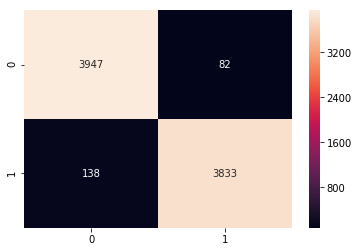

In [102]:
predict = clf.predict(X_test)

cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='g')

In [103]:
print(classification_report(y_test, predict))

NameError: name 'classification_report' is not defined

## Интроспекция

In [104]:
import eli5
eli5.show_weights(clf, top=(20, 20), vec=vectorizer)

Weight?,Feature
+3.888,you
+2.961,buzzfeed
+2.949,these
+2.901,2015
+2.812,things
+2.746,this
+2.701,17
+2.636,we
+2.627,confessions
+2.592,21


In [105]:
eli5.show_prediction(clf, df['text'][101], vec=vectorizer)

## Совсем новый текст

In [106]:
eli5.show_prediction(clf, '1 things you should', vec=vectorizer)

# Если классификаторы вас не любят, просто запомните эти два-три-н слова

## Нграммы



In [173]:
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier

vectorizer = CountVectorizer(ngram_range=(1, 2))

y = df['label']
X = vectorizer.fit_transform(df['text'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/i/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Оценка

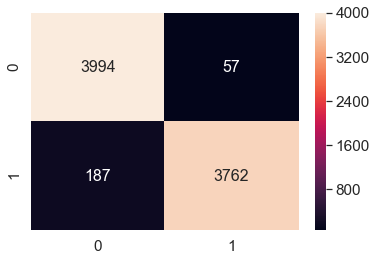

In [174]:
predict = clf.predict(X_test)

cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g')

## Интроспекция

In [175]:
import eli5
eli5.show_weights(clf, top=(20, 20), vec=vectorizer)

Weight?,Feature
+3.683,you
+3.137,this
+2.794,these
+2.697,things
+2.628,but not
+2.611,17
+2.603,your
+2.592,21
+2.525,2015
+2.474,buzzfeed


In [177]:
# from sklearn.linear_model import LogisticRegression
# # from sklearn.linear_model import SGDClassifier

# vectorizer = CountVectorizer(ngram_range=(2, 2))

# y = df['label']
# X = vectorizer.fit_transform(df['text'])
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# clf = LogisticRegression()
# clf.fit(X_train, y_train)

/home/i/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Мешок слов

In [199]:
bag_of_words = df['text'][30996].split()
print(bag_of_words)

['FBI', 'confirms', 'that', 'ricin', 'was', 'not', 'found', 'at', 'the', 'University', 'of', 'Texas']


In [201]:
print(['FBI', 'not', 'confirms', 'that', 'ricin', 'was', 'found', 'at', 'the', 'University', 'of', 'Texas'])

['FBI', 'not', 'confirms', 'that', 'ricin', 'was', 'found', 'at', 'the', 'University', 'of', 'Texas']


In [202]:
print(sorted(['FBI', 'not', 'confirms', 'that', 'ricin', 'was', 'found', 'at', 'the', 'University', 'of', 'Texas']))

['FBI', 'Texas', 'University', 'at', 'confirms', 'found', 'not', 'of', 'ricin', 'that', 'the', 'was']


## [task] Negation

![](negation.png)

https://aclanthology.info/catalog?q=negation&search_field=all_fields&sort=publish_date+desc%2C+venue_type+asc%2C+paper_anthology+asc%2C+score+asc&utf8=✓

## [task] Анализ тональности
![](https://www.brandwatch.com/wp-content/resize/uploads/2015/01/royal-baby1.jpg)

Анализ тональности -- задача выявления эмоциональной окрашенности текста


# Языковая модель для генерации

Цель языкового моделирование -- оценить вероятностное распределения последовательности слов.

## Собираем слова вместе

In [22]:

words = []
for title in df['text'].tolist():
    words.extend(title.split())

words[:10]

['Should',
 'I',
 'Get',
 'Bings',
 'Which',
 'TV',
 'Female',
 'Friend',
 'Group',
 'Do']

In [4]:
import nltk

freqs = nltk.FreqDist(words) # словарь с частотами
freqs.most_common(20)

[('The', 4880),
 ('You', 4823),
 ('in', 4360),
 ('to', 3401),
 ('To', 3254),
 ('A', 2834),
 ('of', 2674),
 ('Your', 2573),
 ('Of', 2426),
 ('In', 2106),
 ('Are', 2065),
 ('Is', 2038),
 ('That', 1853),
 ('This', 1829),
 ('for', 1692),
 ('And', 1641),
 ('On', 1519),
 ('For', 1471),
 ('Will', 1313),
 ('With', 1264)]

## Частоты пар / биграмм

In [6]:
# an nltk.ConditionalFreqDist() counts frequencies of pairs.
# When given a list of bigrams, it maps each first word of a bigram
# to a FreqDist over the second words of the bigram.

cfreq_2gram = nltk.ConditionalFreqDist(nltk.bigrams(words))

cfreq_2gram.conditions()[:10]

['Should',
 'I',
 'Get',
 'Bings',
 'Which',
 'TV',
 'Female',
 'Friend',
 'Group',
 'Do']

In [8]:
cfreq_2gram["I"]

FreqDist({'Had': 22, 'Learned': 18, 'Met': 11, 'Went': 10, 'Tried': 10, 'Ever"': 9, 'Wish': 8, 'Have': 7, 'Hate': 7, 'Got': 5, ...})

In [44]:
cfreq_2gram["I"].most_common(10)

[('Had', 22),
 ('Learned', 18),
 ('Met', 11),
 ('Went', 10),
 ('Tried', 10),
 ('Ever"', 9),
 ('Wish', 8),
 ('Have', 7),
 ('Hate', 7),
 ('Got', 5)]

## Вероятности биграмм

In [13]:
# an nltk.ConditionalProbDist() maps pairs to probabilities.
# One way in which we can do this is by using Maximum Likelihood Estimation (MLE)

cprob_2gram = nltk.ConditionalProbDist(cfreq_2gram, nltk.MLEProbDist)

# Here is what we find for "my": a Maximum Likelihood Estimation-based probability distribution,
# as a MLEProbDist object.

cprob_2gram["I"] # Вероятность I

<MLEProbDist based on 265 samples>

In [45]:
# примеры слов что могут идти _после_ I
cprob_2gram["I"].samples() 



dict_keys(['Get', 'Died', 'Cried', 'Asked', 'JUST', "Don't", 'Turned', 'Went', 'Have', 'Tried', 'Will', 'And', 'Had', 'Search', 'Returned', 'Could', 'Watch', 'Dump', "Can't", 'Wish', 'Got', 'Read', 'Messing', 'Ever"', 'Delete', 'Wore', 'Met', 'Saw', 'Actually', 'Ever', 'Made', 'Drew', 'Learned', 'Cried"', 'Won', 'Ate', 'Cleaned', 'Decided', 'Dressed', 'Lie', 'Survived', 'Finally', 'Was', 'Successfully', 'Hate', 'Watched', 'Spent', 'Fucking', 'Realised', 'Need', 'Tweeted', 'Gave', 'Let', 'Bet', 'Think', 'Earned', 'Loved', 'Discovered', 'Worked', 'Make', 'Never', 'Pretended', 'Puzzle', 'Just', 'Keep', 'Literally', 'Lived', 'Joined', 'Moved', 'Road', 'Rewatched', 'Accidentally', 'Did', 'Confronted', 'Played', 'Started', 'Carried', 'Would', 'Rise"', 'Want"', 'Thought', 'Terminated', 'Needed', 'Took', 'Stopped', 'Want', 'Miss', 'Used', 'Relived', 'Love', 'Hear', 'Tested', 'Practiced', 'Felt', 'Wait', 'Debate', 'How', "Haven't", 'Forgot', 'Hung', 'Cooked', 'Sharted', 'Filmed', 'Illustrated',

In [46]:
# вероятности пары
cprob_2gram["I"].prob("can")

0.0037735849056603774

## Вероятность целого предложения

In [26]:
freq_1gram = nltk.FreqDist(words)

len_words = len(words)

def unigram_prob(word):
    return freq_1gram[word] / len_words

In [28]:
# P(how do you do) = P(how) * P(do|how) * P(you|do) * P(do | you)

prob_sentence = unigram_prob("how") * cprob_2gram["how"].prob("do") * cprob_2gram["do"].prob("you") * cprob_2gram["you"].prob("do")
prob_sentence

0.0

In [ ]:
text = "I lived in"

## Генерация текста

In [33]:
cprob_2gram["I"].generate()

'Had'

In [56]:
word = "5"
sent = [word]
for index in range(10):
    word = cprob_2gram[ word].generate()
    sent.append(word)
    
' '.join(sent)

'5 Ridiculously Adorable Animals 25 Times "Frasier" Was Grosser Than Reese\'s'

## Сгенерированные примеры

![](lm.png)

'What Was Better Project NASCAR driver Kyle Busch wins season Trade'

'What Is Real, Official UN releases 2005 wraps up German music'

'5 Ridiculously Adorable Animals 25 Times "Frasier" Was Grosser Than Reese\'s'

## [task] Spell Checker

## [task] Predictive Input

# Давай посмотрим на наши слова

## Частоты

In [ ]:
occ = np.asarray(X.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

## График топ 20

In [ ]:
counts_df.sort_values(by='occurrences', ascending=False).head(20).reset_index()['occurrences'].plot()

## Логарифмический график

In [ ]:
counts_df.sort_values(by='occurrences', ascending=False).reset_index()['occurrences'].plot(logy=True, logx=True)

## Все

In [ ]:

counts_df.sort_values(by='occurrences', ascending=False).reset_index()['occurrences'].plot()

## Закон Ципфа

    Закон Ципфа: График для частот слов из статей русской Википедии с рангами от 3 до 170
    Зако́н Ци́пфа («ранг—частота») — эмпирическая закономерность распределения частоты слов естественного языка: если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n (так называемому рангу этого слова, см. шкала порядка). Например, второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и так далее.

![](https://upload.wikimedia.org/wikipedia/ru/d/d8/WikipediaZipf20061023.png)

## [task] Частотные словари 

https://events.yandex.ru/lib/talks/3298/

# Ученые скрывают правда о том, сколько слов в мире! 

## Разреженность
Какое бы количество текстов мы не взяли -- все равно мы не охватим все возможные варианты. 
То есть всегда будет найдется слово, которое мы не знаем. 
Что же делать? 

## Считаем по буквам

In [ ]:
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='char')

y = df['label']
X = vectorizer.fit_transform(df['text'])

## Матрица фичей

In [234]:
pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

,,!,"""",#,$,%,&,',(,),...,ū,ž,ș,–,—,‘,’,“,”,€
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,17,0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Обучение

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/i/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Оценка

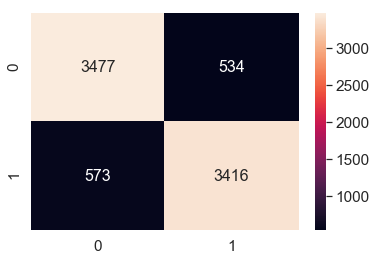

In [232]:
predict = clf.predict(X_test)

cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g')

## Интроспекция

In [233]:
eli5.show_weights(clf, top=(20, 20), vec=vectorizer)

Weight?,Feature
+3.192,#
+1.875,~
+1.489,*
+1.403,1
+1.187,""""
+0.953,2
+0.780,y
+0.698,'
+0.577,3
+0.531,7


# В 1000 раз уменьшить пространство поможет...

## SVD
http://setosa.io/ev/principal-component-analysis/

In [257]:
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='char')

y = df['label']
X = vectorizer.fit_transform(df['text'])

from sklearn.decomposition import TruncatedSVD
reduction = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=10, random_state=1)

X = reduction.fit_transform(X)

## И насколько удачно?

In [258]:
reduction.explained_variance_ratio_

array([0.26920855, 0.0874913 , 0.07649243, 0.06156538, 0.05775399,
       0.04970766, 0.04578179, 0.03998638, 0.03677468, 0.02723373,
       0.025327  , 0.02396207, 0.02277534, 0.01908023, 0.01819263,
       0.0168658 , 0.01588423, 0.01407279, 0.01317707, 0.01237941])

## Матрица фичей

N-мерная, плотная (dense) 

In [259]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,4.502505,0.190886,-0.775230,-1.164937,1.376269,0.658344,0.736311,0.565431,-0.560651,-0.695982,0.238065,0.029557,0.444907,-0.380691,0.374927,1.146634,1.100070,-0.656614,0.383892,-0.030631
1,11.237178,-1.668986,-1.144095,-2.221002,-1.544651,2.686419,-0.613922,-0.939760,-1.035007,-0.125998,0.446753,0.068409,-0.387298,0.319977,0.014007,1.495573,0.260076,0.104997,0.034350,0.015468
2,19.973982,-2.115749,2.424616,1.814920,0.999753,-0.378023,0.782070,-1.048270,-2.356732,0.441527,-0.554046,2.485648,0.040057,-0.822352,-1.661006,-1.354658,0.151660,0.064225,-0.098677,-1.465736
3,16.648882,-1.614476,1.049893,-3.772022,0.948268,0.945684,-1.626378,-2.821278,-1.867869,0.299179,0.890171,1.088651,-2.044283,0.233181,-2.376549,-0.395602,1.643077,-0.749496,1.162912,1.165512
4,26.816670,0.692826,-3.128817,1.248466,-0.621674,1.537405,-3.700107,-0.467002,-1.032437,-0.325272,-0.395538,1.317613,1.245525,1.668151,0.861586,0.971343,0.872619,0.550211,2.926340,1.738365
5,17.760973,-3.948542,-5.267518,-0.315939,1.668893,-0.017377,0.376126,-4.281513,0.591554,-0.962786,-1.365331,0.757033,-0.514309,-1.144087,-0.999719,1.258187,-0.052221,1.861805,-0.362234,-1.817843
6,13.222600,0.896435,-3.028268,0.674779,1.717701,-1.901962,-2.730110,-0.712947,-1.331854,-0.840113,0.899218,-0.014668,0.343255,-0.890499,-0.142176,0.241773,0.406136,-0.959667,-0.786025,-1.727627
7,9.736003,1.060996,2.397107,-3.065686,-1.110359,-0.981768,1.548683,-0.689658,-1.732967,-0.225164,-0.945834,-0.725373,-0.248405,-0.018645,-1.193923,0.005906,-1.097372,0.673457,-0.729498,0.447917
8,15.467640,-1.950624,1.137827,-0.010136,1.215357,-3.122041,0.915032,0.029076,-1.000284,-0.660682,1.085298,-0.805379,1.072706,0.079336,-0.123215,-1.506183,0.752437,-0.362294,0.530717,0.884400
9,25.554554,0.490275,-0.710806,7.088653,-1.653468,3.708952,1.175792,1.366978,0.224336,-0.039238,-0.439662,0.890318,-1.090204,-0.980193,1.151006,1.399046,-1.437716,-1.504703,-1.667291,0.387948


## Обучение

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/i/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Оценка

In [85]:
predict = clf.predict(X_test)

cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='g')

NameError: name 'clf' is not defined

## [task] Latent semantic analysis (LSA)

[![Watch the video](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Topic_model_scheme.webm/450px-seek%3D17.6-Topic_model_scheme.webm.jpg)](https://upload.wikimedia.org/wikipedia/commons/7/70/Topic_model_scheme.webm)


# Как сделать свой Google
кстати про поиск

## Векторизуем наши документы

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(df['text'])
matrix

<32000x22761 sparse matrix of type '<class 'numpy.int64'>'
	with 283201 stored elements in Compressed Sparse Row format>

## Векторизуем запрос

In [119]:
query = vectorizer.transform(['10 greatest things'])
query

<1x22761 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

## Считаем косинусное расстояние
![](https://neo4j.com/docs/graph-algorithms/current/images/cosine-similarity.png)

In [110]:
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(query, X).flatten()
cosine_similarities

array([0., 0., 0., ..., 0., 0., 0.])

## Отбираем ближайшие документы

In [122]:
related_docs_indices = cosine_similarities.argsort()[:-5:-1]
related_docs_indices
df[df.index.isin(related_docs_indices)]

array([5859, 4350, 7450, 6518])

,text,label
4350,"24 Reasons Why There Will Never Be A Movie Greater Than ""10 Things I Hate About You""",1
5859,"21 Things You May Not Have Known About ""10 Things I Hate About You""",1
6518,10 Life-Changing Things To Try In 2016,1
7450,22 Of The Greatest Things To Ever Happen On Snapchat,1


## [task] Information Retrieval (IR)

# Всего 2 размерности дадут вам...

## Снова SVD

In [261]:
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='char')

y = df['label']
X = vectorizer.fit_transform(df['text'])

from sklearn.decomposition import TruncatedSVD
reduction = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=10, random_state=1)

X = reduction.fit_transform(X)

## Матрица фичей

In [262]:
pd.DataFrame(X)

,0,1
0,4.502505,0.190887
1,11.237178,-1.668986
2,19.973982,-2.115753
3,16.648882,-1.614479
4,26.816670,0.692824
5,17.760973,-3.948543
6,13.222600,0.896437
7,9.736003,1.060997
8,15.467640,-1.950621
9,25.554554,0.490272


## Визуализация

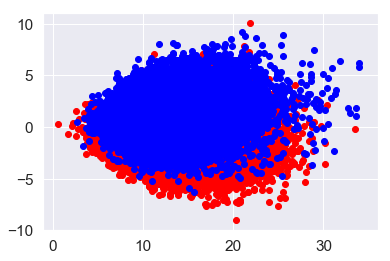

In [263]:
import matplotlib.pyplot as plt 

label1 = df[df['label'] == 1].index
plt.scatter(X[label1, 0], X[label1, 1], c='red')

label0 = df[df['label'] == 0].index
plt.scatter(X[label0, 0], X[label0, 1], c='blue')

## [task] Text visualization

http://textvis.lnu.se

# Американские ученые открыли, что смысл слов ближе чем... 


## построим матрицу слово-слово
(на базе https://github.com/madrugado/word2vec-article/blob/master/svd-example-2.ipynb)

In [126]:
import nltk 

dic = {}
for sent in df['text'].tolist()[:1000]: # не все тексты, а только часть для простоты
    words = nltk.word_tokenize(sent.lower())
    for w in words:
        if w not in dic:
            dic[w] = {}
        for w2 in words:
            dic[w][w2]=1

In [127]:

words_df = pd.DataFrame(dic).fillna(0)
words_df

,should,i,get,bings,which,tv,female,friend,group,do,...,shops,flicks,oliver,designer,gotham,2-year-old,candle,heartbreakingly,5sos,soon
#,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
',0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'',1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
'00s,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'80s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'90s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Снова сведем к 2 размерностям

In [128]:
from sklearn.decomposition import PCA

pca = PCA()

res = pca.fit_transform(words_df)

<Figure size 1008x1008 with 0 Axes>

/home/i/.local/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


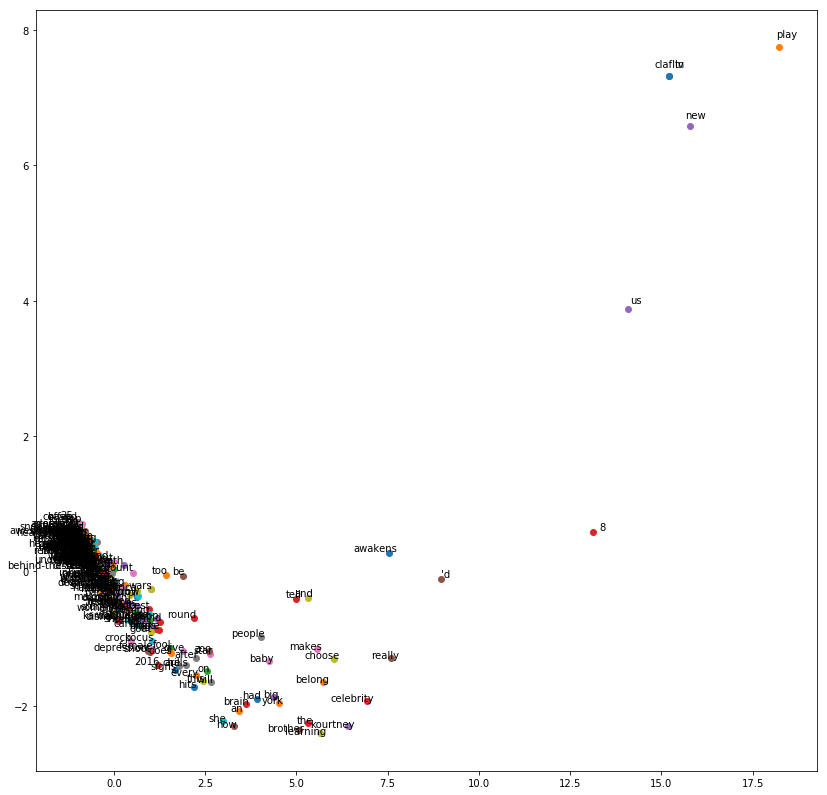

In [129]:
plt.figure(figsize=(14, 14))
# plt.scatter(res[:,0], res[:,1])
for i, label in enumerate(words_df.columns[:300]):
    x, y = res[i,0], res[i,1]
    _ = plt.scatter(x, y);
    _ = plt.annotate(label, xy=(x, y),  textcoords='offset points',
                   ha='right', va='bottom', );

## [task] Word embeddings

# Граммы, которые изменили мир
Skip-gram и word2vec 

## Конвертируем в список списков слов

In [3]:
import nltk

sents = [nltk.word_tokenize(text) for text in df['text'].str.lower().tolist()]
sents[:5]

[['should', 'i', 'get', 'bings'],
 ['which', 'tv', 'female', 'friend', 'group', 'do', 'you', 'belong', 'in'],
 ['the',
  'new',
  '``',
  'star',
  'wars',
  ':',
  'the',
  'force',
  'awakens',
  "''",
  'trailer',
  'is',
  'here',
  'to',
  'give',
  'you',
  'chills'],
 ['this',
  'vine',
  'of',
  'new',
  'york',
  'on',
  '``',
  'celebrity',
  'big',
  'brother',
  "''",
  'is',
  'fucking',
  'perfect'],
 ['a',
  'couple',
  'did',
  'a',
  'stunning',
  'photo',
  'shoot',
  'with',
  'their',
  'baby',
  'after',
  'learning',
  'she',
  'had',
  'an',
  'inoperable',
  'brain',
  'tumor']]

## Обучаем word2vec

In [4]:
import gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

model = gensim.models.Word2Vec(
    sents, size=150, window=10, min_count=2, workers=10)

model.train(sents, total_examples=len(sents), epochs=10)

2019-02-17 13:11:14,373 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-02-17 13:11:14,374 : INFO : collecting all words and their counts
2019-02-17 13:11:14,376 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-02-17 13:11:14,427 : INFO : PROGRESS: at sentence #10000, processed 106062 words, keeping 9816 word types
2019-02-17 13:11:14,472 : INFO : PROGRESS: at sentence #20000, processed 204231 words, keeping 17280 word types
2019-02-17 13:11:14,517 : INFO : PROGRESS: at sentence #30000, processed 290234 words, keeping 23870 word types
2019-02-17 13:11:14,525 : INFO : collected 24900 word types from a corpus of 307636 raw words and 32000 sentences
2019-02-17 13:11:14,527 : INFO : Loading a fresh vocabulary
2019-02-17 13:11:14,586 : INFO : effective_min_count=2 retains 13170 unique words (52% of original 24900, drops 11730)
2019-02-17 13:11:14,587 : INFO : effective_min_count=2 leaves 295906 word corpus (96% of origin

2019-02-17 13:11:19,405 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-02-17 13:11:19,407 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-02-17 13:11:19,426 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-02-17 13:11:19,431 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-02-17 13:11:19,436 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-02-17 13:11:19,438 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-02-17 13:11:19,446 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-02-17 13:11:19,453 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-02-17 13:11:19,464 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-02-17 13:11:19,466 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-02-17 13:11:19,467 : INFO : EPOCH - 2 : training on 307636 raw words (248751 effectiv

2019-02-17 13:11:23,628 : INFO : EPOCH - 9 : training on 307636 raw words (248738 effective words) took 0.6s, 386598 effective words/s
2019-02-17 13:11:24,197 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-02-17 13:11:24,229 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-02-17 13:11:24,242 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-02-17 13:11:24,245 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-02-17 13:11:24,247 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-02-17 13:11:24,254 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-02-17 13:11:24,270 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-02-17 13:11:24,285 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-02-17 13:11:24,288 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-02-17 13:11:24,303 : INFO : worker thread

(2488635, 3076360)

## Каждое слово -- вектор

In [5]:
model.wv['what'] # 150-мерный

array([ 2.5495832 , -0.15145165,  0.12227418,  0.6182997 ,  1.4100726 ,
       -0.88174164,  0.7747539 , -0.12211919, -1.5262986 ,  0.28629246,
       -1.4012618 , -0.53227794, -0.7896283 ,  1.776751  ,  1.1211486 ,
       -0.88629925, -1.7627712 , -1.8043538 , -2.305602  ,  2.3257685 ,
       -1.1226333 , -2.1105638 , -4.539574  ,  1.2930623 , -1.1260538 ,
       -1.2284695 ,  2.5145543 ,  0.5434512 ,  1.1479883 , -0.48036063,
        0.3653344 , -0.13128558, -0.19184962, -1.7550317 , -0.29750735,
       -0.96806866,  0.3153134 , -1.0478001 , -0.28039283, -0.6336068 ,
        1.6981606 ,  2.0862005 , -0.86229134,  2.0151472 , -2.3098962 ,
       -1.8449843 , -0.7224822 , -0.42976078,  0.01696035, -0.06828001,
       -1.0268018 , -0.28178108,  0.71797603,  0.04039228,  0.7926042 ,
        0.13963406,  0.41317505, -0.00456017,  2.4881694 , -1.6847441 ,
       -3.4980295 , -0.57167757, -1.6725712 , -0.6477492 ,  1.2978575 ,
        2.6348753 ,  1.0612514 , -2.4759138 , -0.00709897, -0.11

## Похожие слова

In [6]:
model.wv.most_similar('what')

2019-02-17 13:11:25,219 : INFO : precomputing L2-norms of word weight vectors
/home/i/.local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('where', 0.8123525977134705),
 ('stuff', 0.6757053732872009),
 ('lube', 0.6647443175315857),
 ('why', 0.6554192304611206),
 ('thing', 0.6481071710586548),
 ('poop', 0.6474874019622803),
 ('missions', 0.6384924054145813),
 ('waffles', 0.6234473586082458),
 ('how', 0.6220960021018982),
 ('everything', 0.6151090264320374)]

In [7]:
model.wv.most_similar('obama')

[('plan', 0.8030462265014648),
 ('bush', 0.7994256019592285),
 ('bill', 0.7886388897895813),
 ('clinton', 0.7810721397399902),
 ('budget', 0.7770345211029053),
 ('stimulus', 0.7750716805458069),
 ('u.s.', 0.7681556344032288),
 ('pay', 0.7663970589637756),
 ('initial', 0.7663031816482544),
 ('talks', 0.7612322568893433)]

In [8]:
model.wv.most_similar('love')

[('live', 0.7231693267822266),
 ('depression', 0.7154814004898071),
 ('exist', 0.7029169201850891),
 ('come', 0.7026402950286865),
 ('something', 0.6984738111495972),
 ('mean', 0.6908562183380127),
 ('little', 0.6857780814170837),
 ('friends', 0.6673998236656189),
 ('learn', 0.6608626842498779),
 ('get', 0.6574633121490479)]

## Близость слов

In [9]:
model.wv.distance('love', 'hate')

0.3919733762741089

In [10]:
model.wv.distance('love', 'friend')

0.5188460052013397

In [11]:


vocab = list(model.wv.vocab)
X = model[vocab]

from sklearn.decomposition import PCA

pca = PCA(2)

res = pca.fit_transform(X)

w2v_df = pd.DataFrame(res, index=vocab, columns=['x', 'y'])


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


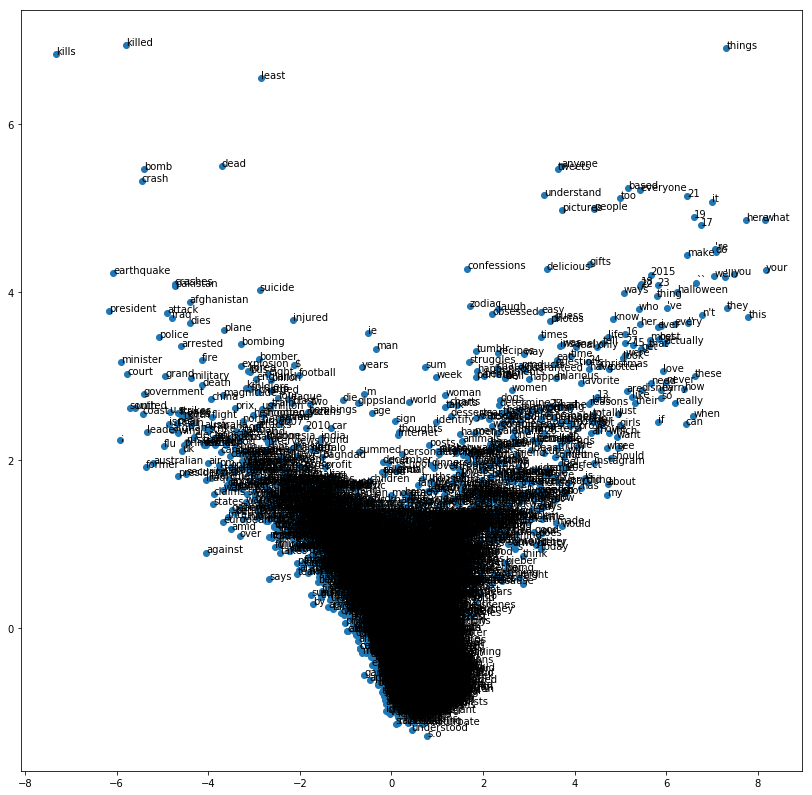

In [14]:
# fig = plt.figure()
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(w2v_df['x'], w2v_df['y'])

for word, pos in w2v_df.iterrows():
    _ = ax.annotate(word, pos);

# PyTorch

## install

In [ ]:
! pip install --upgrade git+https://github.com/pytorch/text

## 

In [ ]:
import pandas as pd
import numpy as np
import torch

## fields

In [ ]:
from torchtext.data import Field
tokenize = lambda x: x.split()
TEXT = Field(sequential=True, tokenize=tokenize, lower=True)
 
LABEL = Field(sequential=False, use_vocab=False)

## data

In [ ]:
VAL_RATIO = 0.2
def prepare_csv(seed=1):
    df_train = pd.read_csv("df.csv")
    idx = np.arange(df_train.shape[0])
    np.random.seed(seed)
    np.random.shuffle(idx)
    val_size = int(len(idx) * VAL_RATIO)
    df_train.iloc[idx[val_size:], :].to_csv("df_train.csv", index=False)
    df_train.iloc[idx[:val_size], :].to_csv("df_val.csv", index=False)

In [ ]:
prepare_csv()

##

In [ ]:
from torchtext.data import TabularDataset
 
tv_datafields = [
                 ("text", TEXT), # we won't be needing the id, so we pass in None as the field
                 ("label", LABEL),
                 ]
trn, vld = TabularDataset.splits(
               path="./", # the root directory where the data lies
               train='df_train.csv', validation="df_val.csv",
               format='csv',
               skip_header=True, # if your csv header has a header, make sure to pass this to ensure it doesn't get proceesed as data!
               fields=tv_datafields)


##

In [ ]:
trn.head

In [ ]:
trn[0]

##

In [ ]:
trn[0].__dict__.keys()

##

In [ ]:
trn[0].text[:3]

##

In [ ]:
TEXT.build_vocab(trn)

##

In [ ]:
from torchtext.data import Iterator, BucketIterator
 
train_iter, val_iter = BucketIterator.splits(
 (trn, vld), # we pass in the datasets we want the iterator to draw data from
 batch_sizes=(64, 64),
 device=-1, # if you want to use the GPU, specify the GPU number here
 sort_key=lambda x: len(x.text), # the BucketIterator needs to be told what function it should use to group the data.
 sort_within_batch=False,
 repeat=False # we pass repeat=False because we want to wrap this Iterator layer.
)

##

In [ ]:
class BatchWrapper:
    def __init__(self, dl, x_var, y_vars):
        self.dl, self.x_var, self.y_vars = dl, x_var, y_vars # we pass in the list of attributes for x and y
    
    def __iter__(self):
        for batch in self.dl:
            x = getattr(batch, self.x_var) # we assume only one input in this wrapper
            
            if self.y_vars is not None: # we will concatenate y into a single tensor
                y = torch.cat([getattr(batch, feat).unsqueeze(1) for feat in self.y_vars], dim=1).float()
            else:
                y = torch.zeros((1))

            yield (x, y)
    
    def __len__(self):
        return len(self.dl)
 

##

In [ ]:
train_dl = BatchWrapper(train_iter, "text", ["label"])
valid_dl = BatchWrapper(val_iter, "text", ["label"])


##

In [ ]:
next(train_dl.__iter__())

##

## Нейросетка

In [ ]:
from torch import nn

class SimpleBiLSTMBaseline(nn.Module):
    def __init__(self, hidden_dim, emb_dim=300,
                 spatial_dropout=0.05, recurrent_dropout=0.1, num_linear=1):
        super().__init__() # don't forget to call this!
        self.embedding = nn.Embedding(len(TEXT.vocab), emb_dim)
        self.encoder = nn.LSTM(emb_dim, hidden_dim, num_layers=1, dropout=recurrent_dropout)
        self.linear_layers = []
        for _ in range(num_linear - 1):
            self.linear_layers.append(nn.Linear(hidden_dim, hidden_dim))
        self.linear_layers = nn.ModuleList(self.linear_layers)
        self.predictor = nn.Linear(hidden_dim, 1)
    
    def forward(self, seq):
        hdn, _ = self.encoder(self.embedding(seq))
        feature = hdn[-1, :, :]
        for layer in self.linear_layers:
            feature = layer(feature)
        preds = self.predictor(feature)
        return preds

##

In [ ]:

em_sz = 100
nh = 500
nl = 3
model = SimpleBiLSTMBaseline(nh, emb_dim=em_sz); model

## 

In [ ]:
import tqdm

In [ ]:
opt = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_func = nn.BCEWithLogitsLoss()

In [ ]:
epochs = 2

## Обучаем

In [ ]:
%%time
for epoch in range(1, epochs + 1):
    running_loss = 0.0
    running_corrects = 0
    model.train() # turn on training mode
    for x, y in tqdm.tqdm(train_dl): # thanks to our wrapper, we can intuitively iterate over our data!
        opt.zero_grad()

        preds = model(x)
        loss = loss_func(preds, y)
        loss.backward()
        opt.step()
        
        running_loss += loss.item() * x.size(0)
        
    epoch_loss = running_loss / len(trn)
    
    # calculate the validation loss for this epoch
    val_loss = 0.0
    model.eval() # turn on evaluation mode
    for x, y in valid_dl:
        preds = model(x)
        loss = loss_func(preds, y)
        val_loss += loss.item() * x.size(0)

    val_loss /= len(vld)
    print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch, epoch_loss, val_loss))

# Программисты в ужасе от того, что может генерация кода 
Применение методов NLP к задачам обработки языков программирования. 

## [Machine Learning for Big Code and Naturalness](https://ml4code.github.io/papers.html)

![](survey.png)
https://arxiv.org/abs/1709.06182

## [JetBrains Research](https://research.jetbrains.org/ru/groups/ml_methods)

# ШОК! Количество задач опять выросло

https://nlpprogress.com

# Резюме

## Очень много чего интересного еще

- multi-task joint learning
- reinforcement learning
- корпусную лингвистику
- мультиязыковые модели
- диалоговые системы
- ...

## 3 причины почему сложно:

- неоднозначен
- разрежен 
- потенциально бесконечная вложенность

## 3 подхода к методам:

- rule-based
- статистический
- нейросетевой

## Знайте Python

## Знайте классные тулзы

## sklearn

![](sklearn.png)
https://scikit-learn.org/stable/

## NLTK
![](nltk.png)

https://www.nltk.org/book/

## gensim

![](gensim.png)

https://rare-technologies.com/

## pytorch

https://github.com/hunkim/PyTorchZeroToAll

## AllenNLP

https://demo.allennlp.org/machine-comprehension

## Читайте

## ACL Anthology

![](acl.png)
 https://aclanthology.info

## Диалог
![](dialog.png)

## Arxiv
https://arxiv.org

![](arxivfeed.png)
https://vk.com/arxivfeed

## Semantic Scholar
![](ss.png)
https://www.semanticscholar.org/

## Awesome NLP
![](awesome.png)
https://github.com/keon/awesome-nlp

# Летняя школа по NLP

## 

![](lsh.jpg)